<a href="https://colab.research.google.com/github/fader2077/INPEPENDENT_STUDY/blob/main/Fruits_using_pretrained_model_resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving fruit.zip to fruit.zip


In [2]:
!ls

fruit.zip  sample_data


In [ ]:
!wget https://www.dropbox.com/s/tbdty2r6xxjl89o/imagenet1000_clsidx_to_labels.txt

--2023-08-15 15:45:55--  https://www.dropbox.com/s/tbdty2r6xxjl89o/imagenet1000_clsidx_to_labels.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/tbdty2r6xxjl89o/imagenet1000_clsidx_to_labels.txt [following]
--2023-08-15 15:45:55--  https://www.dropbox.com/s/raw/tbdty2r6xxjl89o/imagenet1000_clsidx_to_labels.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5c987df213ae17651da2472489.dl.dropboxusercontent.com/cd/0/inline/CB3PRJBGPhAKTOJZlG81TzpLf1k3S8xn9HGDkmnSmuGO_Hp9zrUnY8-pb55bB4Yl7GVyRCzSu04oOiWJm9cd_K7ElF-wwaP32gNlWcN183syOzRnCIWIgeIr9NresIelKuo/file# [following]
--2023-08-15 15:45:56--  https://uc5c987df213ae17651da2472489.dl.dropboxusercontent.com/cd/0/inline/CB3PRJBGPhAKTOJZlG81TzpLf1k3S8xn9HGDkmnSmuGO_Hp9zrUnY8-pb

In [ ]:
with open('imagenet1000_clsidx_to_labels.txt') as f_txt:
  lines = f_txt.readlines()
n_class = len(lines)
print('n_class =',n_class)
class_list = []
for line in lines:
  object_class = line.split("'")[1]
  class_list.append(object_class)
print('including', class_list[:5])

n_class = 1000
including ['tench, Tinca tinca', 'goldfish, Carassius auratus', 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias', 'tiger shark, Galeocerdo cuvieri', 'hammerhead, hammerhead shark']


In [27]:
!rm -rf datasets/ #刪除資料夾

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip fruit.zip

Archive:  fruit.zip
   creating: MY_data/predict/
  inflating: MY_data/predict/0.jpeg  
  inflating: MY_data/predict/00.jpeg  
 extracting: MY_data/predict/011.jpeg  
  inflating: MY_data/predict/012.jpeg  
  inflating: MY_data/predict/0122.jpeg  
  inflating: MY_data/predict/0124.jpeg  
  inflating: MY_data/predict/023.jpeg  
  inflating: MY_data/predict/1.jpeg  
  inflating: MY_data/predict/147.jpeg  
  inflating: MY_data/predict/2.jpeg  
  inflating: MY_data/predict/202.jpeg  
  inflating: MY_data/predict/22.jpeg  
  inflating: MY_data/predict/3.jpeg  
  inflating: MY_data/predict/321.jpeg  
 extracting: MY_data/predict/33.jpeg  
  inflating: MY_data/predict/365.jpeg  
  inflating: MY_data/predict/4.jpeg  
  inflating: MY_data/predict/41.jpeg  
  inflating: MY_data/predict/65.jpeg  
  inflating: MY_data/predict/659.jpeg  
  inflating: MY_data/predict/66.jpeg  
  inflating: MY_data/predict/68.jpeg  
  inflating: MY_data/predict/77.jpeg  
 extracting: MY_data/predict/9.jpeg  
  inflat

In [ ]:
import glob
import os
images = glob.glob('./MY_data/train/Apple/*')
print(images)


[]


In [ ]:

n = 1          # 設定名稱從 1 開始
for i in images:
    os.rename(i, f'./MY_data/train/Apple/apple_{n:01d}.jpg')   # 改名時，使用字串格式化的方式進行三位數補零
    n = n + 1    # 每次重複時將 n 增加

In [3]:
import os
data_dir = './MY_data/train/'
all_img = sorted(os.listdir(data_dir))
print(len(all_img))
print(all_img[:5])
print(all_img[-5:])

2252
['apple.1.jpg', 'apple.10.jpg', 'apple.100.jpg', 'apple.101.jpg', 'apple.102.jpg']
['watermelon.95.jpg', 'watermelon.96.jpg', 'watermelon.97.jpg', 'watermelon.98.jpg', 'watermelon.99.jpg']


In [4]:
import numpy as np
data_info = {'apple':[],'avocado':[],'banana':[],'cherry':[],'kiwi':[],'mango':[],'orange':[],'pinenapple':[],'strawberries':[],'watermelon':[]}
train_info = {}
val_info = {}

for img_name in all_img:
  class_name = img_name.split('.')[0]
  data_info[class_name].append(img_name)

for class_name in data_info.keys():
  n_img = len(data_info[class_name])
  print(class_name,':',n_img)
  np.random.shuffle(data_info[class_name])
  n_train=int(round(n_img*0.7))
  train_info[class_name] = data_info[class_name][:n_train]
  val_info[class_name] = data_info[class_name][n_train:]





apple : 230
avocado : 230
banana : 181
cherry : 230
kiwi : 230
mango : 231
orange : 230
pinenapple : 230
strawberries : 230
watermelon : 230


In [5]:
for class_name in data_info.keys():
  print(class_name)
  print('total_images :',len(data_info[class_name]))
  print('train :',len(train_info[class_name]))
  print('val :',len(val_info[class_name]))

apple
total_images : 230
train : 161
val : 69
avocado
total_images : 230
train : 161
val : 69
banana
total_images : 181
train : 127
val : 54
cherry
total_images : 230
train : 161
val : 69
kiwi
total_images : 230
train : 161
val : 69
mango
total_images : 231
train : 162
val : 69
orange
total_images : 230
train : 161
val : 69
pinenapple
total_images : 230
train : 161
val : 69
strawberries
total_images : 230
train : 161
val : 69
watermelon
total_images : 230
train : 161
val : 69


In [6]:
data_dir='./datasets/'
if(not os.path.exists(data_dir)):
  os.mkdir(data_dir)
train_dir = data_dir+ 'train/'
if(not os.path.exists(train_dir)):
  os.mkdir(train_dir)
val_dir = data_dir + 'val/'
if(not os.path.exists(val_dir)):
  os.mkdir(val_dir)
!ls

datasets  fruit.zip  MY_data  sample_data


In [8]:
import shutil

from_dir = './MY_data/train/'
for class_name in data_info.keys():
  to_dir = train_dir + class_name + '/'
  if(not os.path.exists(to_dir)):
    os.mkdir(to_dir)
  for img_name in train_info[class_name]:
    shutil.copy(from_dir+img_name,to_dir+img_name)
  to_dir = val_dir + class_name + '/'
  if(not os.path.exists(to_dir)):
    os.mkdir(to_dir)
  for img_name in val_info[class_name]:
    shutil.copy(from_dir+img_name,to_dir+img_name)

In [9]:
#→ 檢查切分後的資料數
for phase in ['train','val']:
  print(phase)
  for class_name in data_info.keys():
    check_dir = './datasets/' + phase + '/' + class_name + '/'
    img_list = os.listdir(check_dir)
    print(class_name,':',len(img_list))
  print('')

train
apple : 161
avocado : 161
banana : 127
cherry : 161
kiwi : 161
mango : 162
orange : 161
pinenapple : 161
strawberries : 161
watermelon : 161

val
apple : 69
avocado : 69
banana : 54
cherry : 69
kiwi : 69
mango : 69
orange : 69
pinenapple : 69
strawberries : 69
watermelon : 69



In [10]:
# Transfer Learning using pretrained model resnet50

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import copy
import os

n_epoch = 30
s_batch = 64

data_dir = './datasets/'

data_transforms = {
  'train': transforms.Compose([
    transforms.Resize((224,224)),
    #transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
  ]),
  'val': transforms.Compose([
    transforms.Resize((224,224)),
    #transforms.CenterCrop(224),
    transforms.ToTensor(),
    #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
  ])
}

dsets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
dset_loaders = {x: torch.utils.data.DataLoader(dsets[x], batch_size=s_batch, shuffle=True, num_workers=0) for x in ['train', 'val']}
dset_sizes = {x: len(dsets[x]) for x in ['train', 'val']}
print(dset_sizes)
dset_classes = dsets['train'].classes
n_class = len(dset_classes)
print(dset_classes,n_class)

use_gpu = torch.cuda.is_available()
print('GPU available?', use_gpu)
print('')

inputs, classes = next(iter(dset_loaders['train']))
out = torchvision.utils.make_grid(inputs)

def train_model(model, criterion, optimizer, lr_scheduler, saved_model_name = '', num_epoch=10):
  since = time.time()

  best_model = model
  best_acc = 0.0

  for epoch in range(num_epoch):
    print('Epoch {}/{}'.format(epoch, num_epoch - 1))
    print('-' * 10)

    for phase in ['train', 'val']:
      if phase == 'train':
        optimizer = lr_scheduler(optimizer, epoch)
        model.train(True)
      else:
        model.train(False)

      running_loss = 0.0
      running_corrects = 0

      for data in dset_loaders[phase]:
        inputs, labels = data
        if use_gpu:
          inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        else:
          inputs, labels = Variable(inputs), Variable(labels)
        optimizer.zero_grad()
        outputs = model(inputs)
        _, preds = torch.max(outputs.data, 1)
        loss = criterion(outputs, labels)

        if phase == 'train':
          loss.backward()
          optimizer.step()

        running_loss += loss.data
        running_corrects += torch.sum(preds == labels.data).item()
        #print(preds,labels.data, torch.sum(preds == labels.data).item())

      epoch_loss = running_loss / dset_sizes[phase]
      epoch_acc = running_corrects / dset_sizes[phase]

      print('{} Loss: {:.4f} Acc: {:.4f}'.format(
          phase, epoch_loss, epoch_acc))

      if phase == 'val' and epoch_acc > best_acc:
        best_acc = epoch_acc
        best_model = copy.deepcopy(model)
        if(os.path.exists(saved_model_name)):
          os.remove(saved_model_name)
        acc_str = str(round(best_acc,4)).split('.')[1]
        saved_model_name = 'resnet_val_0' + acc_str + '.pkl'
        torch.save(best_model, saved_model_name)
    print()

  time_elapsed = time.time() - since
  print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
  print("Best val Acc: {:4f}".format(best_acc))
  return best_model, saved_model_name


def exp_lr_scheduler(optimizer, epoch, init_lr=0.005, lr_decay_epoch=5):
  lr = init_lr * (0.5 ** (epoch // lr_decay_epoch))
  if epoch % lr_decay_epoch == 0:
    print("LR is set to {}".format(lr))
  for param_group in optimizer.param_groups:
    param_group['lr'] = lr
  return optimizer

# Finetuning the convnet
model_ft = models.resnet18(pretrained=True)
#model_ft = models.resnet50(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, n_class)

if use_gpu:
  model_ft = model_ft.cuda()

criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.005, momentum=0.9)

model_ft, model_name = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epoch=n_epoch)


{'train': 1577, 'val': 675}
['apple', 'avocado', 'banana', 'cherry', 'kiwi', 'mango', 'orange', 'pinenapple', 'strawberries', 'watermelon'] 10
GPU available? True



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 203MB/s]


Epoch 0/29
----------
LR is set to 0.005
train Loss: 0.0194 Acc: 0.6100
val Loss: 0.0066 Acc: 0.8844

Epoch 1/29
----------
train Loss: 0.0033 Acc: 0.9404
val Loss: 0.0044 Acc: 0.9067

Epoch 2/29
----------
train Loss: 0.0012 Acc: 0.9841
val Loss: 0.0041 Acc: 0.9333

Epoch 3/29
----------
train Loss: 0.0007 Acc: 0.9930
val Loss: 0.0035 Acc: 0.9304

Epoch 4/29
----------
train Loss: 0.0005 Acc: 0.9949
val Loss: 0.0033 Acc: 0.9378

Epoch 5/29
----------
LR is set to 0.0025
train Loss: 0.0003 Acc: 1.0000
val Loss: 0.0032 Acc: 0.9407

Epoch 6/29
----------
train Loss: 0.0002 Acc: 0.9994
val Loss: 0.0034 Acc: 0.9437

Epoch 7/29
----------
train Loss: 0.0002 Acc: 0.9994
val Loss: 0.0031 Acc: 0.9437

Epoch 8/29
----------
train Loss: 0.0002 Acc: 0.9994
val Loss: 0.0031 Acc: 0.9407

Epoch 9/29
----------
train Loss: 0.0002 Acc: 1.0000
val Loss: 0.0030 Acc: 0.9437

Epoch 10/29
----------
LR is set to 0.00125
train Loss: 0.0002 Acc: 1.0000
val Loss: 0.0032 Acc: 0.9452

Epoch 11/29
----------
tra

In [11]:
!ls

datasets  fruit.zip  MY_data  resnet_val_09496.pkl  sample_data


In [24]:
# confusion matrix on the validation set

import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import transforms
import numpy as np
import time
import cv2
import os
print('Uing the model of', model_name, 'for inference.')
model_ft = torch.load(model_name)
model_ft.eval()

data_dir= './MY_data/predict/'

use_gpu = torch.cuda.is_available()
if use_gpu:
  model_ft = model_ft.cuda()

tic = time.time()
all_folders = sorted(os.listdir(data_dir))
label_dict = {name:idx for idx, name in enumerate(all_folders)}
print(label_dict)
n_folder = len(all_folders)
cm = np.zeros([n_folder,n_folder])
for i in range(n_folder):
  img_dir = data_dir + all_folders[i]
  all_img = os.listdir(img_dir)
  for img_name in all_img:
    img = cv2.imread(img_dir+img_name)
    y_len, x_len = img.shape[0], img.shape[1]
    y_len = 238 if y_len<x_len else round(238*y_len/x_len)
    x_len = 238 if x_len<y_len else round(238*x_len/y_len)
    cx, cy = x_len//2, y_len//2
    x0, x1, y0, y1 = cx-112, cx+112, cy-112, cy+112
    img = cv2.resize(img,(x_len,y_len))[y0:y1,x0:x1,:]
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    inp = transforms.ToTensor()(img)
    #inp = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(inp)
    if(use_gpu):
      inp= Variable(inp.cuda())
    out = model_ft(inp.view(-1,3,224,224))
    _, preds = torch.max(out.data, 1)
    ind = preds.item()
    cm[i,ind] = cm[i,ind] + 1

print(model_name)
print(cm)
print('acc =',cm.trace()/cm.sum())
toc = time.time()
print(toc-tic,'sec')
print('')

Uing the model of resnet_val_09496.pkl for inference.
{'0.jpeg': 0, '00.jpeg': 1, '011.jpeg': 2, '012.jpeg': 3, '0122.jpeg': 4, '0124.jpeg': 5, '023.jpeg': 6, '1.jpeg': 7, '147.jpeg': 8, '2.jpeg': 9, '202.jpeg': 10, '22.jpeg': 11, '3.jpeg': 12, '321.jpeg': 13, '33.jpeg': 14, '365.jpeg': 15, '4.jpeg': 16, '41.jpeg': 17, '65.jpeg': 18, '659.jpeg': 19, '66.jpeg': 20, '68.jpeg': 21, '77.jpeg': 22, '9.jpeg': 23, '99.jpeg': 24, 'f0.jpeg': 25, 'f1.jpeg': 26, 'f2.jpeg': 27, 'f5.jpeg': 28, 'f7.jpeg': 29, 'img_01.jpeg': 30, 'img_11.jpeg': 31, 'img_121.jpeg': 32, 'img_141.jpeg': 33, 'img_171.jpeg': 34, 'img_191.jpeg': 35, 'img_21.jpeg': 36, 'img_241.jpeg': 37, 'img_301.jpeg': 38, 'img_31.jpeg': 39, 'img_341.jpeg': 40, 'img_361.jpeg': 41, 'img_371.jpeg': 42, 'img_381.jpeg': 43, 'img_401.jpeg': 44, 'img_41.jpeg': 45, 'img_411.jpeg': 46, 'img_421.jpeg': 47}


NotADirectoryError: ignored

In [15]:
def CAM_visualize(ResNet_model, RGB_img, class_id):
  for name, parameters in ResNet_model.named_parameters():
    if(name == 'fc.weight'):
      parm = parameters.cpu().detach().numpy()
  model_act = nn.Sequential(*list(ResNet_model.children())[:-2])

  inp = transforms.ToTensor()(RGB_img)
  if(torch.cuda.is_available()):
    inp = Variable(inp.cuda())
  inp = inp.view(-1,3,224,224)
  activation_maps = model_act(inp).data.cpu().numpy()[0]
  s = activation_maps.shape
  act_map = np.zeros((s[1],s[2]))
  for k in range(s[0]):
    act_map = act_map + activation_maps[k,:,:]*parm[class_id][k]
  minv = act_map.min()
  maxv = act_map.max()
  mmap = (act_map-minv)/(maxv-minv)
  heatmap = cv2.resize(mmap,(224,224),interpolation=cv2.INTER_CUBIC)
  # to HSV color space
  minv = heatmap.min()
  maxv = heatmap.max()
  heatmap = (heatmap-minv)/(maxv-minv)
  color_map = np.ones(img.shape)
  color_map[:,:,0] = (1-heatmap)*120
  color_map[:,:,1] = 255
  color_map[:,:,2] = 255
  color_map = color_map.astype(np.uint8)
  color_map = cv2.cvtColor(color_map, cv2.COLOR_HSV2RGB)
  RGB_fusion = np.uint8(0.5*RGB_img.astype(np.float) + 0.5*color_map.astype(np.float))
  return RGB_fusion


Uing the model of resnet_val_09496.pkl for inference.
img_121.jpeg --> banana


<ipython-input-15-42990d489192>:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  RGB_fusion = np.uint8(0.5*RGB_img.astype(np.float) + 0.5*color_map.astype(np.float))


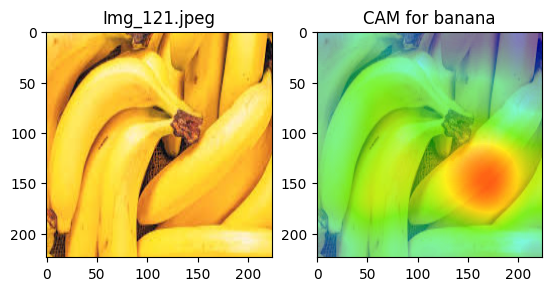


f0.jpeg --> strawberries


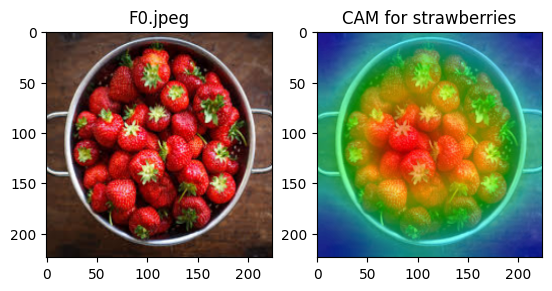


77.jpeg --> pinenapple


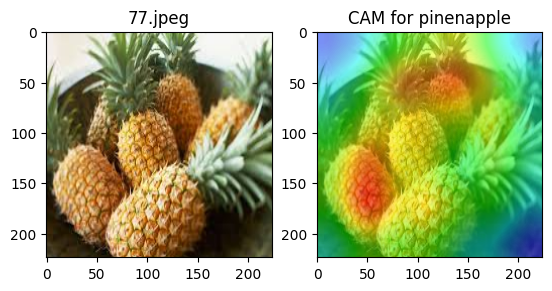


f5.jpeg --> strawberries


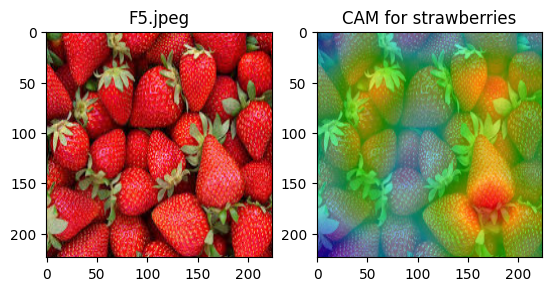


img_411.jpeg --> mango


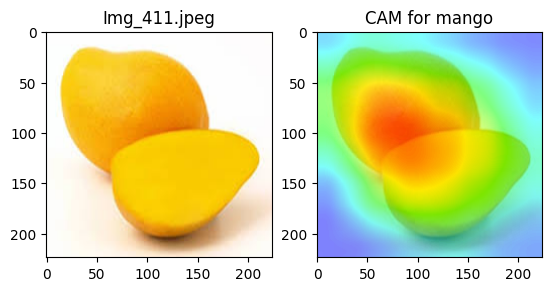


f2.jpeg --> strawberries


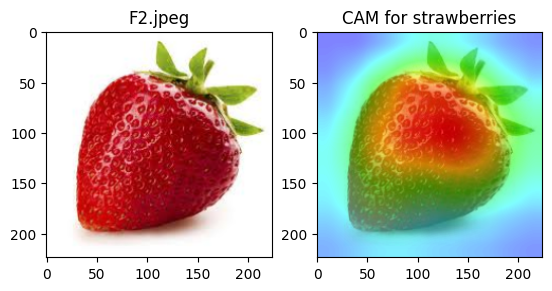


365.jpeg --> kiwi


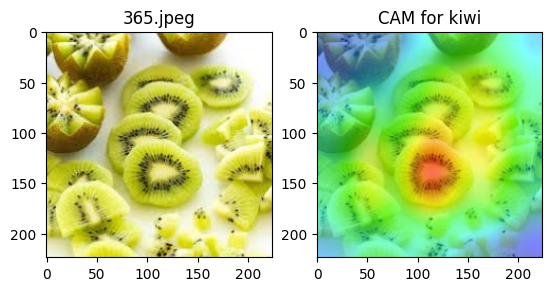


147.jpeg --> kiwi


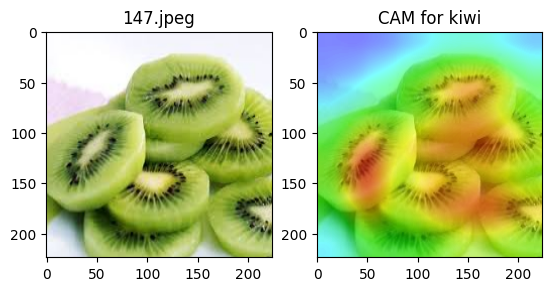


img_41.jpeg --> avocado


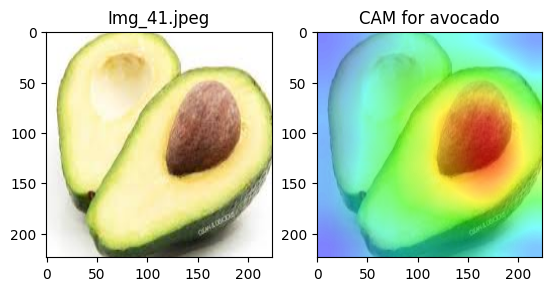


img_11.jpeg --> avocado


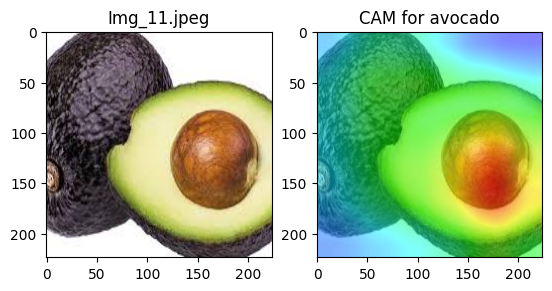

In [17]:
# inference on the testing set

import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import transforms
import numpy as np
import time
import cv2
import os

print('Uing the model of', model_name, 'for inference.')
model_ft = torch.load(model_name)
model_ft.eval()

data_dir= './MY_data/predict/'

use_gpu = torch.cuda.is_available()
if use_gpu:
  model_ft = model_ft.cuda()

tic = time.time()
all_img = sorted(os.listdir(data_dir))
np.random.shuffle(all_img)
label_name_dict = {0:'apple',1:'avocado',2:'banana',3:'cherry',4:'kiwi',5:'mango',6:'orange',7:'pinenapple',8:'strawberries',9:'watermelon'}

n_select = 10

for i in range(n_select):
  img_name = all_img[i]
  img = cv2.imread(data_dir+img_name)
  y_len, x_len = img.shape[0], img.shape[1]
  y_len = 238 if y_len<x_len else round(238*y_len/x_len)
  x_len = 238 if x_len<y_len else round(238*x_len/y_len)
  cx, cy = x_len//2, y_len//2
  x0, x1, y0, y1 = cx-112, cx+112, cy-112, cy+112
  img = cv2.resize(img,(x_len,y_len))[y0:y1,x0:x1,:]
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  inp = transforms.ToTensor()(img)
  #inp = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])(inp)
  if(use_gpu):
    inp= Variable(inp.cuda())
  out = model_ft(inp.view(-1,3,224,224))
  _, preds = torch.max(out.data, 1)
  ind = preds.item()
  predict_label = label_name_dict[ind]
  print(img_name, '-->', predict_label)
  fig, axs = plt.subplots(1,2)
  axs[0].imshow(img)
  axs[0].set_title((img_name).capitalize())
  # CAM Visualization
  fusion_img = CAM_visualize(model_ft,img,ind)
  axs[1].imshow(fusion_img)
  axs[1].set_title('CAM for '+predict_label)
  plt.show()
  print('')
